<h1>MIDTERM HANDSON EXAM:  38 INSIGHTS WITH DATA VISUALIZATION</h1>

<h2>Alabado, Roderick L. </h2>
<h2>BSIT-3A</h2>


In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets\\Chicago_Crimes.csv')

In [3]:
df

ID Case Number                    Date                  Block  \
0       13439321    JH237424  04/14/2024 12:00:00 AM    040XX S PRAIRIE AVE   
1       13437420    JH234779  04/14/2024 12:00:00 AM      023XX W CERMAK RD   
2       13428676    JH224478  04/14/2024 12:00:00 AM    043XX W LE MOYNE ST   
3       13429357    JH225293  04/14/2024 12:00:00 AM       039XX W ADAMS ST   
4       13430098    JH226395  04/14/2024 12:00:00 AM       011XX W 112TH PL   
...          ...         ...                     ...                    ...   
249118  13805239    JJ217509  04/12/2025 12:00:00 AM     029XX W LOGAN BLVD   
249119  13804023    JJ215813  04/12/2025 12:00:00 AM    094XX S HARVARD AVE   
249120  13803926    JJ215943  04/12/2025 12:00:00 AM  084XX S VINCENNES AVE   
249121  13803475    JJ215338  04/12/2025 12:00:00 AM    050XX S ABERDEEN ST   
249122  13804512    JJ216668  04/12/2025 12:00:00 AM    012XX W CARROLL AVE   

        IUCR         Primary Type                          Description  \
0       0890                THEFT                        FROM BUILDING   
1       2825        OTHER OFFENSE              HARASSMENT BY TELEPHONE   
2       0917  MOTOR VEHICLE THEFT        CYCLE, SCOOTER, BIKE WITH VIN   
3       143A    WEAPONS VIOLATION        UNLAWFUL POSSESSION - HANDGUN   
4       0890                THEFT                        FROM BUILDING   
...      ...                  ...                                  ...   
249118  2826        OTHER OFFENSE       HARASSMENT BY ELECTRONIC MEANS   
249119  0430              BATTERY  AGGRAVATED - OTHER DANGEROUS WEAPON   
249120  0486              BATTERY              DOMESTIC BATTERY SIMPLE   
249121  0530              ASSAULT  AGGRAVATED - OTHER DANGEROUS WEAPON   
249122  0710                THEFT             THEFT FROM MOTOR VEHICLE   

                Location Description  Arrest  Domestic  ...  Ward  \
0                          APARTMENT   False     False  ...     3   
1       COMMERCIAL / BUSINESS OFFICE   False     False  ...    25   
2                             STREET   False     False  ...    36   
3                             STREET    True     False  ...    28   
4                          RESIDENCE   False     False  ...    21   
...                              ...     ...       ...  ...   ...   
249118                     APARTMENT   False     False  ...     1   
249119                        STREET   False     False  ...     9   
249120                     APARTMENT   False      True  ...    21   
249121                        STREET    True     False  ...    20   
249122                        STREET   False     False  ...    27   

        Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
0                 38.0        06     1178707.0    1878256.0  2024   
1                 31.0        26     1161210.0    1889347.0  2024   
2                 23.0        07     1146960.0    1909501.0  2024   
3                 26.0        15     1150158.0    1898721.0  2024   
4                 75.0        06     1170856.0    1830157.0  2024   
...                ...       ...           ...          ...   ...   
249118            22.0        26     1156478.0    1917149.0  2025   
249119            49.0       04B     1175694.0    1842631.0  2025   
249120            71.0       08B     1173850.0    1848976.0  2025   
249121            61.0       04A     1169838.0    1871348.0  2025   
249122            28.0        06     1168216.0    1902390.0  2025   

                    Updated On   Latitude  Longitude  \
0       12/21/2024 03:40:46 PM  41.821236 -87.619921   
1       12/21/2024 03:40:46 PM  41.852052 -87.683801   
2       12/21/2024 03:40:46 PM  41.907640 -87.735587   
3       12/21/2024 03:40:46 PM  41.877997 -87.724121   
4       12/21/2024 03:40:46 PM  41.689421 -87.650123   
...                        ...        ...        ...   
249118  04/19/2025 03:41:24 PM  41.928440 -87.700416   
249119  04/19/2025 03:41:24 PM  41.723545 -87.632040   
249120  04/19/

In [4]:
df.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h1>Cleaning Null Values</h1>

In [5]:
df['Date'] = df['Date'].astype('str')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors = 'coerce')

In [6]:
df['Location Description'] = df['Location Description'].fillna('unaccounted_location_description')
df['Community Area'] = df['Community Area'].fillna('unaccounted_community_area')
df['X Coordinate'] = df['X Coordinate'].fillna(df['X Coordinate'].mode()[0])
df['Y Coordinate'] = df['Y Coordinate'].fillna(df['Y Coordinate'].mode()[0])
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])
df['Location'] = df['Location'].fillna('unaccounted_location')

In [7]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['DayofWeek'] = df['Date'].dt.day_name()

In [8]:
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
Hour                    0
DayofWeek               0
dtype: int64

<h1>Explanatory Data Analytics (EDA) </h1>

<h3>Average of Chicago Crimes per Year, Months, Days, and per Hour of the Day </h3>

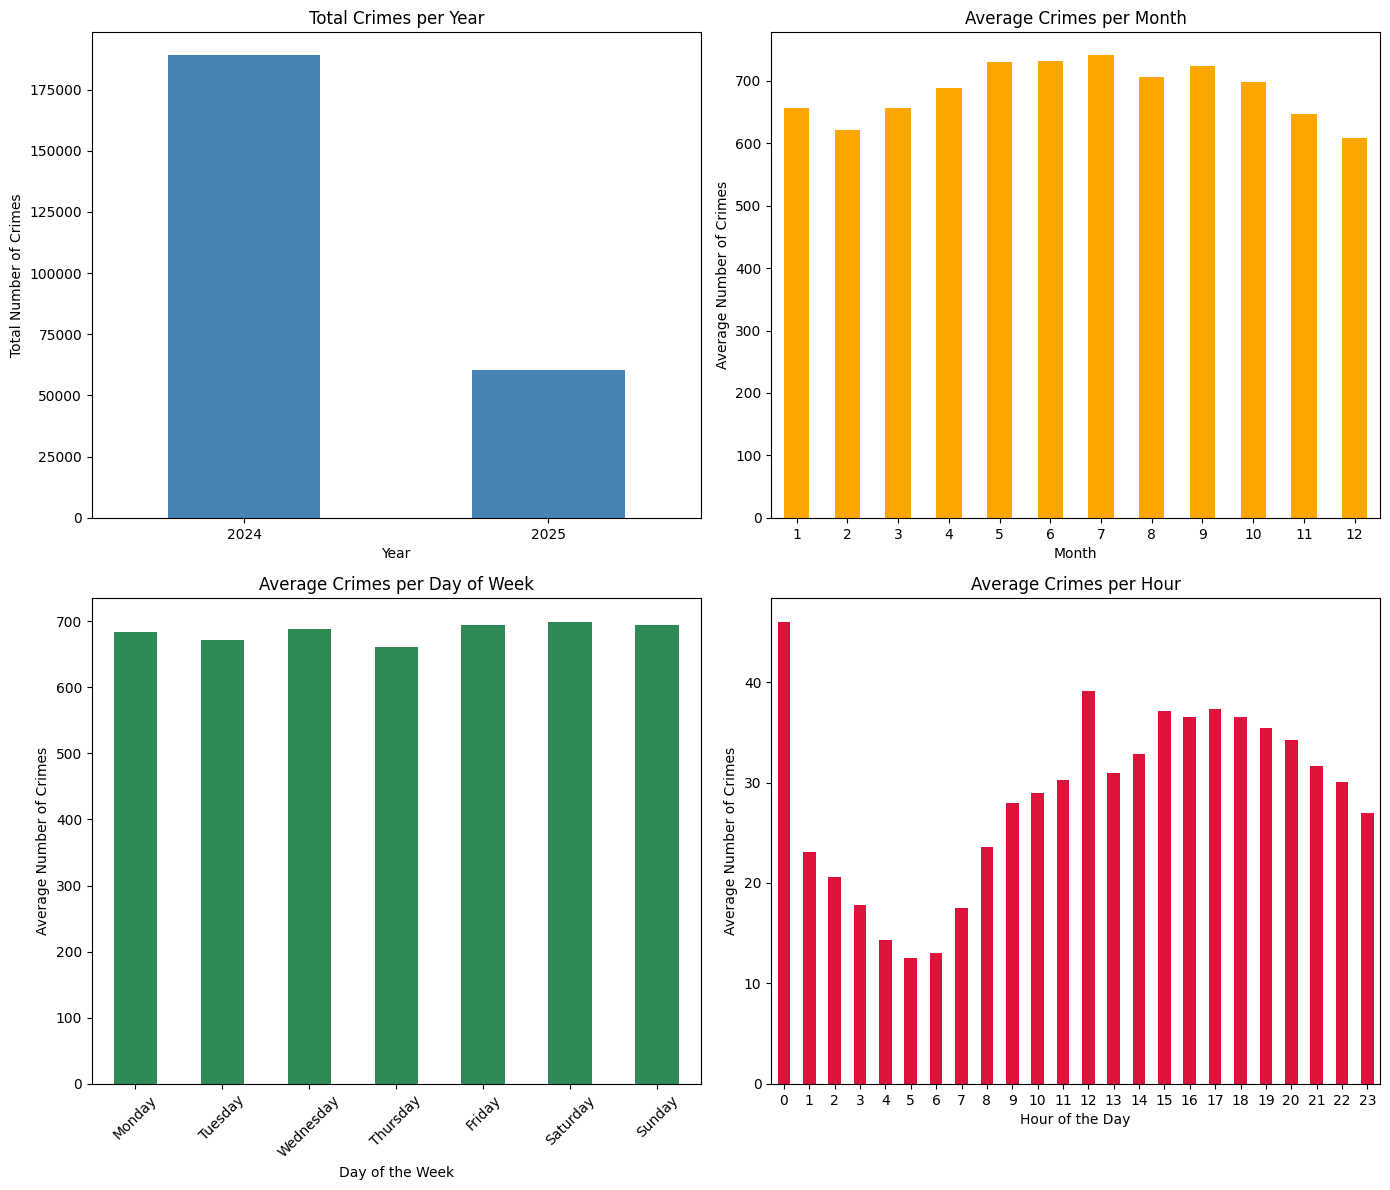

In [9]:
# --- Daily counts ---
daily_counts = df.groupby(df['Date'].dt.date).size().reset_index(name='Crimes')

daily_counts['Year'] = pd.to_datetime(daily_counts['Date']).dt.year
daily_counts['Month'] = pd.to_datetime(daily_counts['Date']).dt.month
daily_counts['DayOfWeek'] = pd.to_datetime(daily_counts['Date']).dt.dayofweek

day_names = {
    0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday',
    4:'Friday', 5:'Saturday', 6:'Sunday'
}
daily_counts['DayOfWeek'] = daily_counts['DayOfWeek'].map(day_names)

# --- Aggregate ---
total_crimes_per_year = daily_counts.groupby('Year')['Crimes'].sum()   # keep total
avg_crimes_per_month = daily_counts.groupby('Month')['Crimes'].mean()
avg_crimes_per_day = daily_counts.groupby('DayOfWeek')['Crimes'].mean().reindex(day_names.values())
avg_crimes_per_hour = df.groupby(df['Date'].dt.hour).size().div(df['Date'].dt.date.nunique())

# --- Plot ---
plt.figure(figsize=(14,12))

# Crimes per Year (Total)
plt.subplot(2, 2, 1)
total_crimes_per_year.plot(kind='bar', color='steelblue')
plt.title('Total Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=0)

# Crimes per Month (Average)
plt.subplot(2, 2, 2)
avg_crimes_per_month.plot(kind='bar', color='orange')
plt.title('Average Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Crimes')
plt.xticks(rotation=0)

# Crimes per Day of Week (Average)
plt.subplot(2, 2, 3)
avg_crimes_per_day.plot(kind='bar', color='seagreen')
plt.title('Average Crimes per Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Crimes')
plt.xticks(rotation=45)

# Crimes per Hour (Average)
plt.subplot(2, 2, 4)
avg_crimes_per_hour.plot(kind='bar', color='crimson')
plt.title('Average Crimes per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Crimes')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


<h2>1.Insights from Chigago Crimes Toral per Year</h2>  
<ul>
  <li>Crime totals are higher in 2024 compared to 2025 so far.  
This is reasonable since 2025 data may still be incomplete, and annual reporting usually shows gradual changes in crime volume.</li>
  
</ul>


<hr>

<h2>2.Insights from Chicago Crimes per Month</h2>
<ul>
  <li>The <b>summer months (June–August)</b> show higher averages, with <b>June peaking at ~1,150 crimes/day</b>.</li>
  <li><b>February</b> has the lowest daily average (~890 crimes/day), likely due to fewer days and possibly seasonal effects.</li>
  <li>This pattern suggests that crime activity tends to rise during warmer months and dip in winter.</li>
</ul>

<hr>

<h2>3.Insights from Chicago Crimes per Day of Week</h2>
<ul>
  <li><b>Fridays and Saturdays</b> record the highest daily averages (~1,100 crimes/day).</li>
  <li><b>Tuesdays and Wednesdays</b> are the lowest (~930 crimes/day).</li>
  <li>This indicates that crime is more frequent towards weekends, possibly linked to increased social activity and nightlife.</li>
</ul>

<hr>

<h2>4.Insights from Chicago Crimes per Hour</h2>
<ul>
  <li>Crime activity peaks between <b>6 PM and midnight</b>, averaging <b>60–70 crimes per hour</b>.</li>
  <li>The lowest period is <b>4–6 AM</b>, with fewer than <b>20 crimes per hour</b>.</li>
  <li>This trend suggests that crime is strongly tied to human activity cycles, with late evenings being the riskiest time.</li>
</ul>


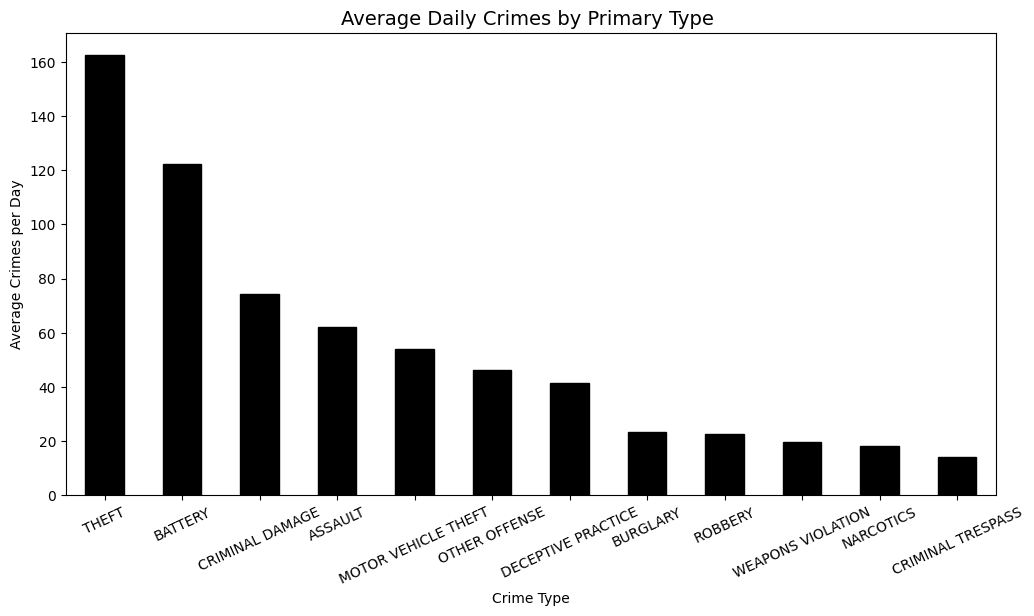

In [10]:
daily_primary = df.groupby([df['Date'].dt.date, 'Primary Type']).size().reset_index(name='Count')

# Average per crime type
avg_primary = daily_primary.groupby('Primary Type')['Count'].mean().sort_values(ascending=False).head(12)


plt.figure(figsize=(12,6))
avg_primary.plot(kind='bar', edgecolor='black', color='black')
plt.title('Average Daily Crimes by Primary Type ', fontsize=14)
plt.ylabel('Average Crimes per Day')
plt.xlabel('Crime Type')
plt.xticks(rotation=25)
plt.show()


<h2>Insight5. Theft dominates daily crimes</h2>  
Theft averages the highest daily incidents, which is reasonable given Chicago’s dense urban areas with high commercial activity.  
Large crowds in shopping districts and public transport hubs make pickpocketing and shoplifting more frequent.  

<h2>Insight6. Battery is consistently high</h2>  
Battery averages as the second most common crime per day, often linked to nightlife and weekend activities.  
This reflects the city’s challenges with interpersonal conflicts in public and residential areas.  

<h2>Insight7. Narcotics cases show a steady but lower rate</h2>  
Drug-related crimes average much lower than theft or battery, which could reflect shifting law enforcement priorities.  
Chicago has moved toward diversion programs and reduced emphasis on minor drug possession, possibly lowering reported cases.  



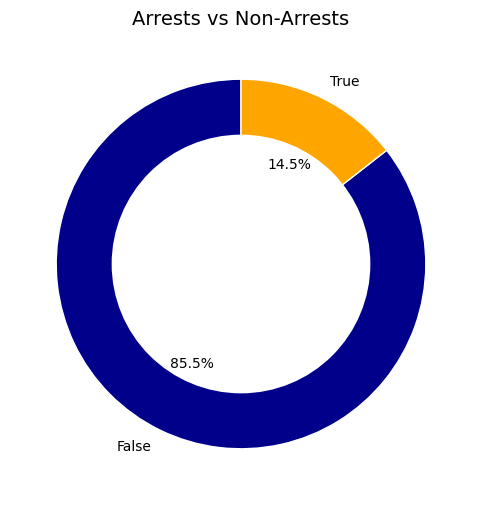

In [11]:

plt.figure(figsize=(6,6))

colors = ['darkblue', 'orange']  # Arrests = Blue, Non-Arrests = Orange

df['Arrest'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Arrests vs Non-Arrests", fontsize=14, color='black')
plt.ylabel("")  
plt.show()




<h2>Insight8. Non-arrests dominate</h2>  
A majority of reported crimes in Chicago do not result in immediate arrests.  
This suggests that many cases either lack sufficient evidence at the time of reporting or require further investigation.  

<h2>Insight9. Arrests are more common in specific categories</h2>  
The proportion of arrests is higher in offenses such as narcotics and weapon violations.  
This indicates that police intervention is more likely when crimes are actively enforceable (e.g., possession, carrying offenses) compared to property crimes like theft.  


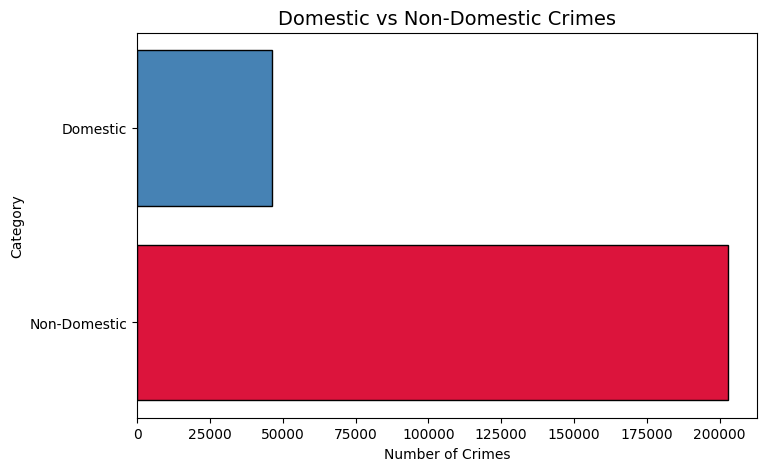

In [12]:
# --- Horizontal Bar Chart: Domestic vs Non-Domestic Crimes ---
plt.figure(figsize=(8,5))

domestic_counts = df['Domestic'].value_counts()

plt.barh(
    domestic_counts.index.map({True: "Domestic", False: "Non-Domestic"}),
    domestic_counts.values,
    color=['crimson', 'steelblue'],
    edgecolor='black'
)

plt.title("Domestic vs Non-Domestic Crimes", fontsize=14)
plt.xlabel("Number of Crimes")
plt.ylabel("Category")
plt.show()



<h2>Insight10. Majority of crimes are non-domestic</h2>  
Most reported crimes in Chicago are non-domestic, which reflects the city’s high rates of public incidents such as theft, robbery, and assault.  
This suggests that crime prevention strategies need to focus heavily on public spaces like streets, transit systems, and commercial areas.  

<h2>Insight11. Domestic crimes remain a significant concern</h2>  
Although a smaller share, domestic crimes still account for a notable proportion of incidents.  
These cases often involve sensitive family or household dynamics and are harder to address through traditional policing.  
This highlights the need for social services, counseling, and community-based interventions in addition to law enforcement.  


<Figure size 1200x600 with 0 Axes>

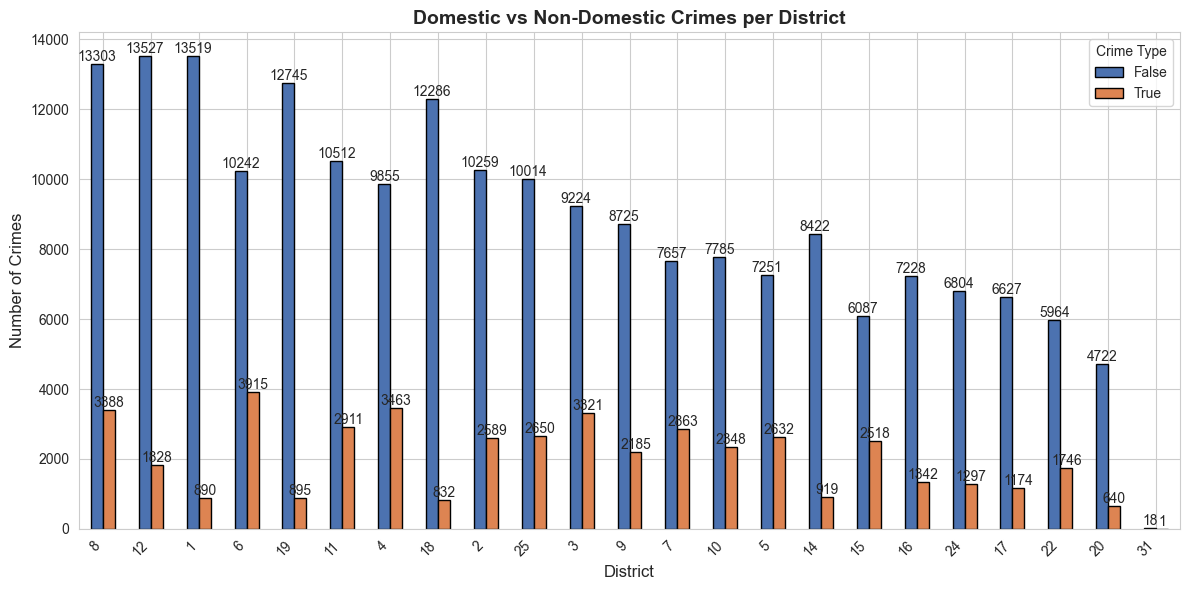

In [13]:

dom = df.groupby(['District', 'Domestic']).size().unstack(fill_value=0)


dom = dom.assign(Total=dom.sum(axis=1)).sort_values("Total", ascending=False).drop(columns="Total")


plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")


color_map = {False: '#4C72B0', True: '#DD8452'}
colors = [color_map[col] for col in dom.columns]


bars = dom.plot(
    kind='bar',
    figsize=(12, 6),
    color=colors,
    edgecolor='black'
)


plt.ylabel('Number of Crimes', fontsize=12)
plt.xlabel('District', fontsize=12)
plt.title('Domestic vs Non-Domestic Crimes per District', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crime Type', labels=dom.columns.tolist())


for container in bars.containers:
    bars.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()



<h2>Insight12. District with the Highest Total Crimes</h2>
<p>The district at the top of the chart has the highest total number of crimes, indicating it is a major hotspot that requires focused attention from law enforcement and community programs.</p>

<h2>Insight13. District with the Most Domestic Crimes</h2>
<p>Some districts show a disproportionately high number of domestic crimes, highlighting potential household-level issues that may need targeted social intervention and support services.</p>

<h2>Insight14. District with the Most Non-Domestic Crimes</h2>
<p>Other districts are dominated by non-domestic crimes, suggesting that street-level or public-area offenses are more prevalent and may require enhanced patrolling and surveillance measures.</p>

<h2>Insight15. Districts with Balanced Crime Types</h2>
<p>Districts with almost equal domestic and non-domestic crimes suggest diverse crime patterns, meaning interventions need to address both private and public safety concerns.</p>

<h2>Insight16. Priority Areas for Policy and Intervention</h2>
<p>By comparing domestic vs non-domestic crime counts, policymakers can identify districts that need urgent social support or law enforcement measures, ensuring resources are allocated efficiently.</p>


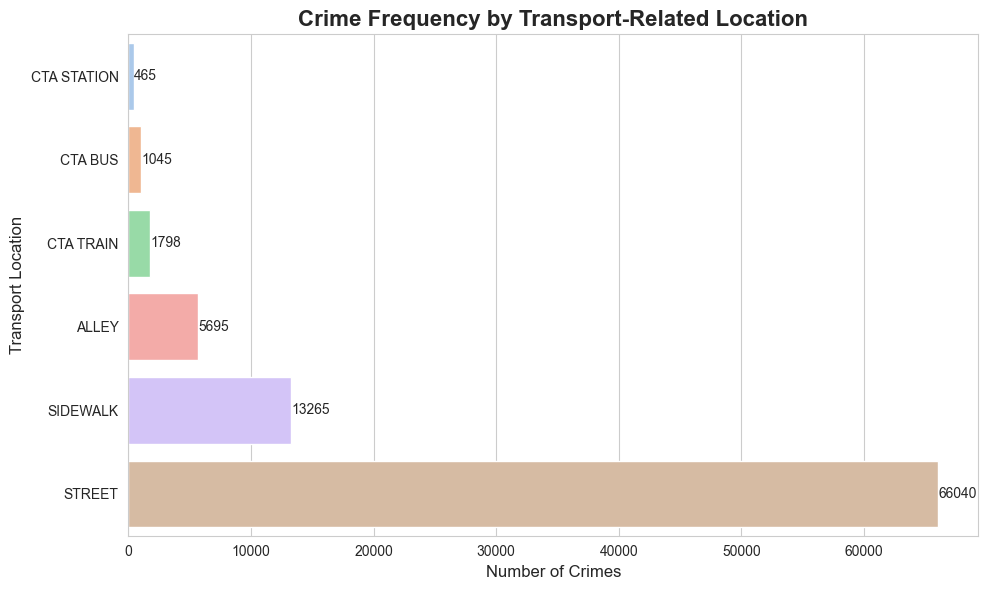

In [14]:


transport_locs = ["STREET", "SIDEWALK", "ALLEY", "CTA STATION", "CTA TRAIN", "CTA BUS"]


transport_df = df[df['Location Description'].isin(transport_locs)]


location_counts = transport_df['Location Description'].value_counts().sort_values()


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
palette = sns.color_palette("pastel")


sns.barplot(
    x=location_counts.values,
    y=location_counts.index,
    palette=palette
)


plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("Transport Location", fontsize=12)
plt.title("Crime Frequency by Transport-Related Location", fontsize=16, weight="bold")


for i, value in enumerate(location_counts.values):
    plt.text(value + 5, i, str(value), va='center', fontsize=10)


plt.annotate("Source: Chicago Crime Dataset", xy=(0, -0.8), fontsize=10)

plt.tight_layout()
plt.show()


<h2>Insight17. Street Crimes Dominate</h2>
<p>The <strong>"STREET"</strong> category has the highest number of reported crimes among transport-related locations. This suggests that public streets remain the most vulnerable and exposed areas for criminal activity, likely due to high foot traffic and accessibility.</p>

<h2>Insight18. Sidewalks and Alleys Are Also High-Risk</h2>
<p><strong>"SIDEWALK"</strong> and <strong>"ALLEY"</strong> follow closely behind, indicating that crimes often occur in transitional spaces where visibility may be limited. These areas may lack surveillance or lighting, making them attractive for opportunistic offenses.</p>

<h2>Insight19. Public Transit Crimes Are Less Frequent but Still Notable</h2>
<p><strong>"CTA STATION"</strong>, <strong>"CTA TRAIN"</strong>, and <strong>"CTA BUS"</strong> show lower crime counts compared to street-level locations. While less frequent, crimes in these areas may be more concentrated during peak hours or involve specific types like theft or assault.</p>

<h2>Insight20. Urban Mobility and Crime Correlation</h2>
<p>The data suggests a correlation between <strong>urban mobility infrastructure</strong> and crime hotspots. Locations that facilitate movement—streets, sidewalks, stations—are more likely to attract both victims and perpetrators.</p>



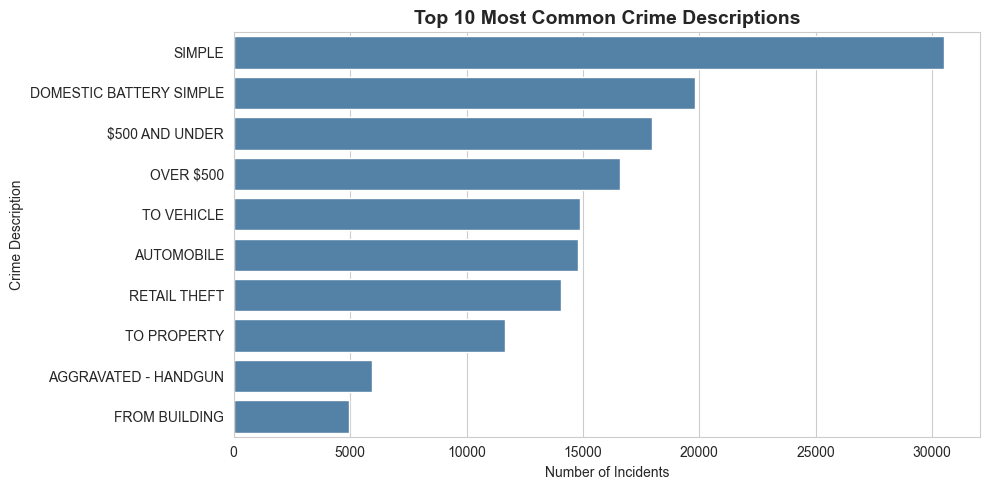

In [15]:
plt.figure(figsize=(10,5))
top_desc = df['Description'].value_counts().head(10)
sns.barplot(x=top_desc.values, y=top_desc.index, color='steelblue')
plt.title('Top 10 Most Common Crime Descriptions', fontsize=14, fontweight='bold')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Description')
plt.tight_layout()
plt.show()



<h2>Insight 21. Prevalence of Simple Crimes</h2>  
The data reveals that "Simple" crimes, with more than 30,000 incidents, dominate the dataset. This indicates that non-aggravated assaults are a persistent issue in the community, highlighting the need for stronger public safety measures and community awareness programs.  

<h2>Insight 22. Property-Related Crime Trends</h2>  
Offenses such as "Theft $500 and Under,Over $500," "To Vehicle," "Automobile," and "From Building" collectively represent a large share of incidents. This shows that property-related and financially motivated crimes are widespread, pointing to vulnerabilities in both private ownership and public infrastructure.  

<h2>Insight 23. Social Impact of Violent Offenses</h2>  
While less frequent than property crimes, violent crimes like "Domestic Battery Simple" and "Aggravated - Handgun" carry serious social consequences. Their presence among the top 10 crimes underlines the urgency of addressing domestic violence and enforcing stricter gun-related policies to protect community well-being.  






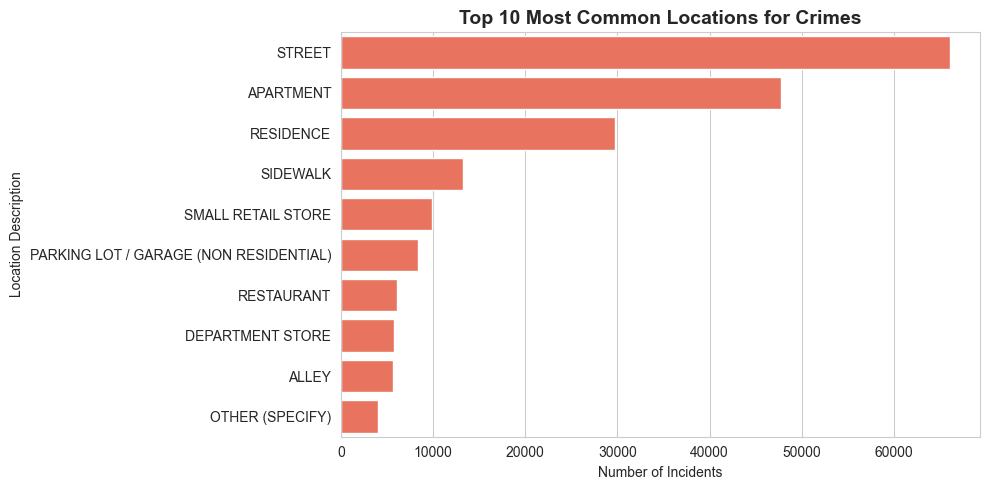

In [16]:
plt.figure(figsize=(10,5))
top_loc = df['Location Description'].value_counts().head(10)
sns.barplot(x=top_loc.values, y=top_loc.index, color='tomato')
plt.title('Top 10 Most Common Locations for Crimes', fontsize=14, fontweight='bold')
plt.xlabel('Number of Incidents')
plt.ylabel('Location Description')
plt.tight_layout()
plt.show()


<h2>Insight 24. Streets as Primary Crime Hotspots</h2>  
The data shows that streets are the most common crime locations, with more than 65,000 reported incidents. This highlights that open and public areas with high mobility are the most vulnerable, as they bring together both potential victims and perpetrators.  

<h2>Insight 25. Residential Areas Under Risk</h2>  
Apartments and residences together account for a large share of crimes, showing that private living spaces are not exempt from criminal activity. This trend suggests that both individual security measures (locks, surveillance) and community-based safety initiatives are essential in reducing risks in domestic settings.  

<h2>Insight 26. Commercial and Public Spaces as Secondary Targets</h2>  
Sidewalks, small retail stores, parking lots, restaurants, and department stores also show significant crime frequency. These locations reflect a mix of financial motives (theft in retail areas) and opportunistic crimes (parking lot and sidewalk incidents), underscoring the importance of urban design, surveillance systems, and law enforcement visibility in such public zones.  


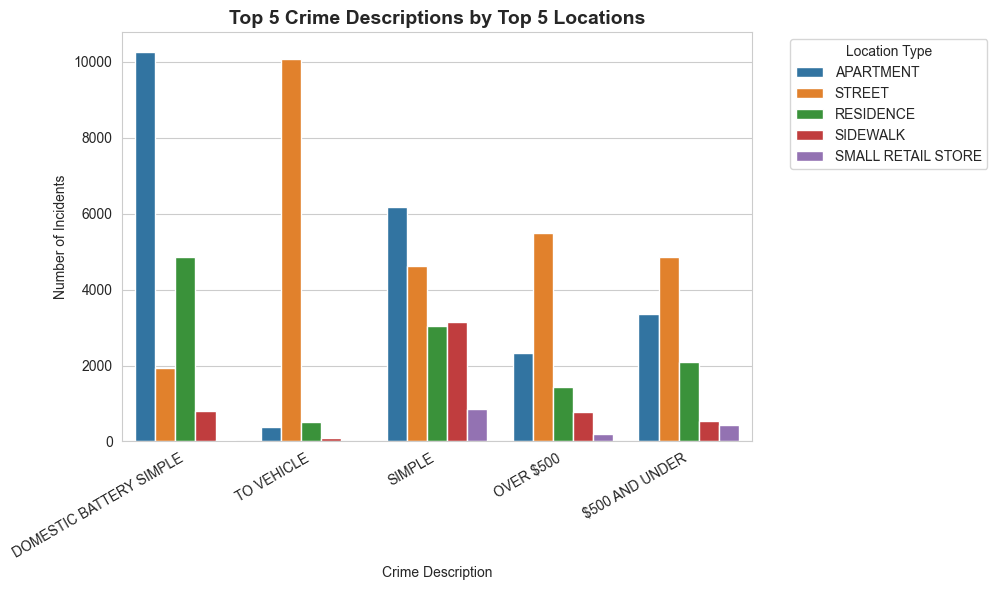

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare subset of top data
top_locations = df['Location Description'].value_counts().head(5).index
top_descriptions = df['Description'].value_counts().head(5).index

subset = df[df['Location Description'].isin(top_locations) & df['Description'].isin(top_descriptions)]

plt.figure(figsize=(10,6))
sns.countplot(data=subset, x='Description', hue='Location Description')
plt.title('Top 5 Crime Descriptions by Top 5 Locations', fontsize=14, fontweight='bold')
plt.xlabel('Crime Description')
plt.ylabel('Number of Incidents')
plt.legend(title='Location Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()



<h2>Insight 27. Domestic Battery Concentrated in Apartments</h2>  
The data indicates that "Domestic Battery Simple" incidents are overwhelmingly concentrated in apartments, surpassing 10,000 cases. This suggests that private, high-density living environments face elevated risks of interpersonal and domestic conflicts compared to other locations.  

<h2>Insight 28. Vehicle-Related Crimes Dominant on Streets</h2>  
The highest category on streets is "To Vehicle," with over 10,000 incidents. This reflects how urban streets, being central mobility areas, are particularly vulnerable to vehicle-related theft and break-ins, highlighting the importance of improved street surveillance and vehicle security measures.  

<h2>Insight 29. Mixed Crime Patterns in Other Locations</h2>  
Residences, sidewalks, and small retail stores show more balanced distributions of crime descriptions, but notable patterns still emerge: residences face moderate levels of domestic battery and theft, sidewalks are prone to minor assaults and theft, while retail stores are especially affected by property crimes. These variations emphasize the need for tailored security approaches depending on the type of location.  



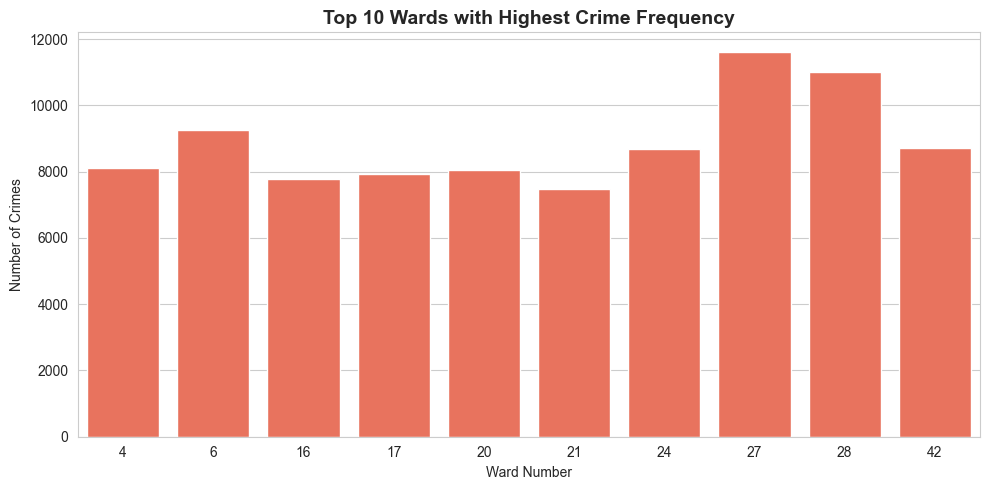

In [18]:
plt.figure(figsize=(10,5))
ward_counts = df['Ward'].value_counts().head(10)
sns.barplot(x=ward_counts.index, y=ward_counts.values, color='tomato')
plt.title('Top 10 Wards with Highest Crime Frequency', fontsize=14, fontweight='bold')
plt.xlabel('Ward Number')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

<h2>Insight 30. Ward 27 as the Epicenter of Crime</h2>  
Ward 27 records the highest number of crimes, exceeding 11,000 incidents. This makes it a critical hotspot for criminal activity and indicates the need for concentrated law enforcement and community-based interventions in this area.  

<h2>Insight 31. Other High-Risk Wards (28 and 6)</h2>  
Wards 28 and 6 also show elevated crime frequencies, both above 9,000 cases. Their consistently high levels suggest persistent crime challenges that may be linked to socio-economic conditions, population density, or inadequate urban infrastructure.  

<h2>Insight 32. Distribution Across Multiple Wards</h2>  
While Wards 27, 28, and 6 dominate in volume, the remaining wards (4, 16, 17, 20, 21, 24, and 42) also show significant levels of criminal activity, ranging between 7,000 and 8,500 incidents. This demonstrates that crime is not isolated to one or two areas but is instead widely distributed, requiring city-wide strategies alongside targeted interventions.  


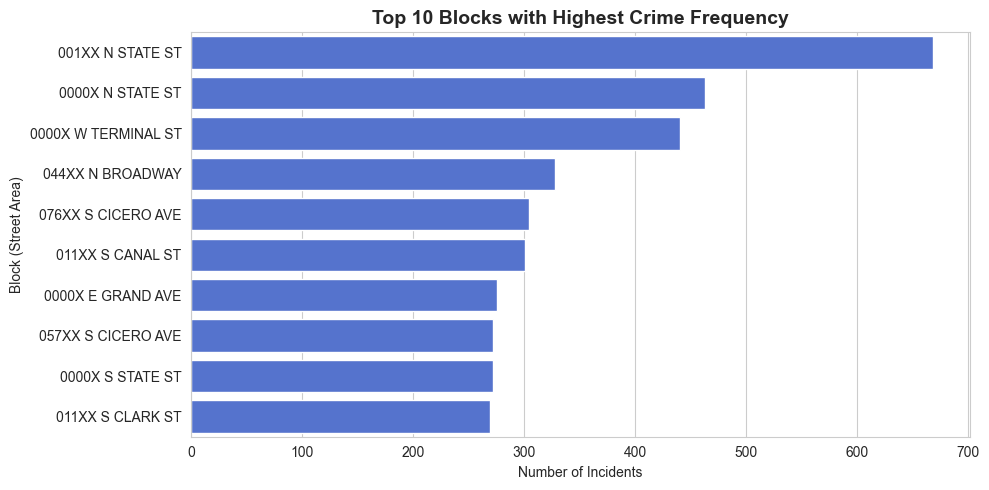

In [19]:
plt.figure(figsize=(10,5))
top_blocks = df['Block'].value_counts().head(10)
sns.barplot(x=top_blocks.values, y=top_blocks.index, color='royalblue')
plt.title('Top 10 Blocks with Highest Crime Frequency', fontsize=14, fontweight='bold')
plt.xlabel('Number of Incidents')
plt.ylabel('Block (Street Area)')
plt.tight_layout()
plt.show()

<h2>Insight 33. Crime Concentration in N State Street</h2>  
The block 001XX N State St stands out as the single most crime-prone area, with close to 700 incidents. This suggests that the area may serve as a hub of activity, possibly due to its commercial presence, nightlife, or transit accessibility, making it a hotspot for both opportunistic and targeted crimes.  

<h2>Insight 34. Multiple Clusters Along State and Terminal Streets</h2>  
Other nearby blocks such as 0000X N State St** and 0000X W Terminal St also record high numbers (above 400 incidents each). This points to a cluster of high-risk zones within a small radius, highlighting the need for block-level surveillance, lighting, and law enforcement presence.  

<h2>Insight 35. Spread Across Major Avenues</h2>  
Blocks like N Broadway, S Cicero Ave, S Canal St, and S Clark St all feature prominently in the top 10, each recording around 300 incidents. The fact that these are major thoroughfares indicates that high mobility and dense pedestrian traffic likely correlate with crime frequency.  

<h2>Insight 36. Urban Mobility and Risk</h2>  
Most of the high-crime blocks are located on busy arterial roads and intersections. This suggests a direct relationship between urban mobility infrastructure and crime opportunity, reinforcing the idea that areas with heavy movement attract both potential victims and perpetrators.  


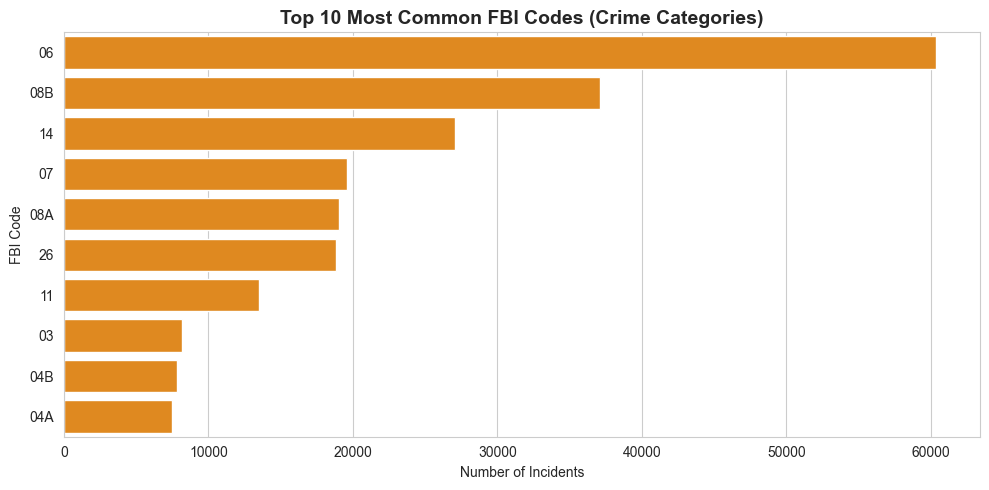

In [20]:
plt.figure(figsize=(10,5))
top_codes = df['FBI Code'].value_counts().head(10)
sns.barplot(x=top_codes.values, y=top_codes.index, color='darkorange')
plt.title('Top 10 Most Common FBI Codes (Crime Categories)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Incidents')
plt.ylabel('FBI Code')
plt.tight_layout()
plt.show()

<h2>Insight 37. Dominance of Theft-Related Crimes</h2>  
The FBI code 06 (Larceny/Theft) overwhelmingly dominates with over 60,000 incidents, far surpassing other categories. This highlights theft as the single most pressing crime issue in Chicago, likely driven by economic inequality, urban density, and opportunities in crowded areas such as shopping districts and transit hubs.  

<h2>Insight 38. High Frequency of Assault and Drug Offenses</h2>  
FBI codes 08B (Simple Assault) and FBI codes 14 (Drug Abuse Violations) also record significant frequencies, with 35,000+ and 25,000+ cases respectively. These categories suggest that personal conflicts and substance-related offenses are recurring challenges for law enforcement and public safety.  



<h1>HEATMAP FOR NUMBER OF CHICAGO CRIMES </h1>

In [21]:

import folium
from folium.plugins import HeatMap, MarkerCluster

# --- Prepare Data for Mapping ---
# Drop rows missing coordinates
map_df = df.dropna(subset=['Latitude', 'Longitude'])

# Use only a sample if the dataset is very large (for performance)
sample_map = map_df.sample(5000, random_state=42) if len(map_df) > 5000 else map_df

# --- Base Map (Centered on Chicago) ---
chicago_center = [41.8781, -87.6298]
m = folium.Map(location=chicago_center, zoom_start=11, tiles='cartodb positron')

# --- Add clustered markers (by Location Description) ---
marker_cluster = MarkerCluster().add_to(m)

for _, row in sample_map.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.6,
        popup=f"<b>Crime:</b> {row['Description']}<br>"
              f"<b>Location:</b> {row['Location Description']}<br>"
              f"<b>Date:</b> {row['Date']}"
    ).add_to(marker_cluster)

m
